### This script tokenizes the articles in test set using BART tokenizer from Huggingface. The tokenized articles were then truncated under several different truncation conditions

In [1]:
!pip install transformers

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from transformers import BartTokenizer
from time import time
import matplotlib.pyplot as plt

tokenizer = BartTokenizer.from_pretrained("facebook/bart-large-cnn")

### Tokenize with BART tokenizer, max length = 1024

In [9]:
# load the test dataset, tokenize the articles
test_df = pd.read_csv('/content/drive/MyDrive/NLP Summarization Project/Data/Cleaned Test Data.csv')
test_source = test_df['article'].tolist()

articles_tokenized = tokenizer(test_source, max_length= None, truncation='only_first', padding='max_length',return_tensors='pt')
input_array = articles_tokenized['input_ids'].numpy()

In [ ]:
# find the starting position of padding tokens
padding_start = np.argmax(input_array == tokenizer.pad_token_id, axis = 1)

# if the starting position is 0, it means the article was truncated to the max length
# and there is no padding token, so set the starting position to 1024
padding_start = np.where(padding_start==0, 1024, padding_start)

print('token shape', input_array.shape)
print('padding token id', tokenizer.pad_token_id)
print('min padding location', padding_start.min())

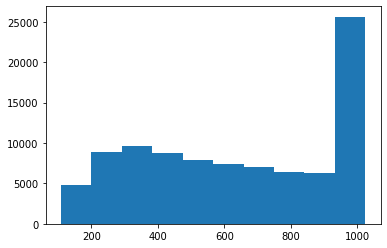

In [11]:
plt.hist(padding_start) 
plt.show()

### Forward truncation, 50% non-padding tokens remain, max length = 512

In [ ]:
# reduce padding indices to half, modify input array and truncate
padding_start_512 = padding_start.copy()
padding_start_512 = (padding_start_512/2).round().astype(int)

input_array_512 = input_array.copy()

for row, start_col in enumerate(padding_start_512):
  if start_col < 512:
      input_array_512[row,start_col:] = tokenizer.pad_token_id

input_array_512 = input_array_512[:, :512]

### Forward truncation, 25% non-padding tokens remain, max length = 256


In [ ]:
# reduce padding indices to quarter, modify input array and truncate
padding_start_256 = padding_start.copy()
padding_start_256 = (padding_start_256/4).round().astype(int)

input_array_256 = input_array.copy()

for row, start_col in enumerate(padding_start_256):
  if start_col < 256:
      input_array_256[row,start_col:] = tokenizer.pad_token_id

input_array_256 = input_array_256[:, :256]

### Forward truncation, 12.5% non-padding tokens remain, max length = 128

In [ ]:
# reduce padding indices to eighth, modify input array and truncate
padding_start_128 = padding_start.copy()
padding_start_128 = (padding_start_128/8).round().astype(int)

input_array_128 = input_array.copy()

for row, start_col in enumerate(padding_start_128):
  if start_col < 128:
      input_array_128[row,start_col:] = tokenizer.pad_token_id

input_array_128 = input_array_128[:, :128]

### Backward truncation, 87.5% non-padding tokens remain

In [ ]:
# reduce padding indices to eighth
padding_start_eighth = padding_start.copy()
padding_start_eighth = (padding_start_eighth/8).round().astype(int)

# everything before new padding start position is replaced with padding token
# next non-padding token is replaced with the beginning-of-sentence-token
input_array_eighth = input_array.copy()

for row, start_col in enumerate(padding_start_eighth):
    input_array_eighth[row,:start_col] = tokenizer.pad_token_id
    input_array_eighth[row, start_col] = tokenizer.bos_token_id

### Backward truncation, 75% non-padding tokens remain

In [ ]:
# reduce padding indices to quarter
padding_start_quarter = padding_start.copy()
padding_start_quarter = (padding_start_quarter/4).round().astype(int)

# everything before new padding start position is replaced with padding token
# next non-padding token is replaced with the beginning-of-sentence-token
input_array_quarter = input_array.copy()

for row, start_col in enumerate(padding_start_quarter):
    input_array_quarter[row,:start_col] = tokenizer.pad_token_id
    input_array_quarter[row, start_col] = tokenizer.bos_token_id

### Backward truncation, 50% non-padding tokens remain

In [ ]:
# reduce padding indices to half
padding_start_half = padding_start.copy()
padding_start_half = (padding_start_half/2).round().astype(int)

# everything before new padding start position is replaced with padding token
# next non-padding token is replaced with the beginning-of-sentence-token
input_array_half = input_array.copy()

for row, start_col in enumerate(padding_start_half):
    input_array_half[row,:start_col] = tokenizer.pad_token_id
    input_array_half[row, start_col] = tokenizer.bos_token_id

test_tensor_half = torch.tensor(input_array_half)

In [ ]:
# save tensors
test_tensor = torch.tensor(input_array)
torch.save(test_tensor, '/content/drive/MyDrive/NLP Summarization Project/Data/Test_Articles_BART.pt')

test_tensor_512 = torch.tensor(input_array_512)
torch.save(test_tensor_512, '/content/drive/MyDrive/NLP Summarization Project/Data/Test_Articles_BART_backward truncation 50 percent remain.pt')

test_tensor_256 = torch.tensor(input_array_256)
torch.save(test_tensor_256, '/content/drive/MyDrive/NLP Summarization Project/Data/Test_Articles_BART_backward truncation 25 percent remain.pt')

test_tensor_128 = torch.tensor(input_array_128)
torch.save(test_tensor_128, '/content/drive/MyDrive/NLP Summarization Project/Data/Test_Articles_BART_backward truncation 12.5 percent remain.pt')

test_tensor_half = torch.tensor(input_array_half)
torch.save(test_tensor_half, '/content/drive/MyDrive/NLP Summarization Project/Data/Test_Articles_BART_forward truncation 50 percent remain.pt')

test_tensor_quarter = torch.tensor(input_array_quarter)
torch.save(test_tensor_quarter, '/content/drive/MyDrive/NLP Summarization Project/Data/Test_Articles_BART_forward truncation 25 percent remain.pt')

test_tensor_eighth = torch.tensor(input_array_eighth)
torch.save(test_tensor_eighth, '/content/drive/MyDrive/NLP Summarization Project/Data/Test_Articles_BART_forward truncation 12.5 percent remain.pt')